In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


import warnings
warnings.filterwarnings('ignore')

# 1. HIT

**The initial data was loaded from the file.\
The data was examined for NaNs, as well as the distribution of data for each feature.\
The events were distinguished as target/non-target (1/0) according to the task for subsequent training of the model within the binary classification task**

**Data description:**\
session_id — visit ID;\
hit_ate — event date;\
hit_time — event time;\
hit_number — event sequence number within the session;\
hit_type — event type;\
hit_referer — event source;\
hit_page_path — event page;\
event_category — action type;\
event_action — action;\
event_label — action tag;\
event_value — action result valueu

In [2]:
df1 = pd.read_csv('./data/ga_hits.csv')
df1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [4]:
print(
    f'Count of fully filled objects from the entire sample: {len(df1.dropna())} \n'
    f'Percentage of fully filled objects from the entire sample: {round(len(df1.dropna()) / len(df1) * 100, 2)}'
    )

Count of fully filled objects from the entire sample: 0 
Percentage of fully filled objects from the entire sample: 0.0


In [5]:
missing_values1 = (df1.isna().sum() / len(df1) * 100).sort_values(ascending=False)
missing_values1

event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64

In [6]:
df1 = df1.drop(columns=['event_value'])

In [7]:
print(
    f'Count of fully filled objects from the entire sample: {len(df1.dropna())} \n'
    f'Percentage of fully filled objects from the entire sample: {round(len(df1.dropna()) / len(df1) * 100, 2)}'
    )

Count of fully filled objects from the entire sample: 118953 
Percentage of fully filled objects from the entire sample: 0.76


In [8]:
df1.event_action.value_counts()

view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: event_action, Length: 230, dtype: int64

In [9]:
list_ = df1.event_action.unique().tolist()
list_sub = [i for i in list_ if i[0:3]=='sub']
list_sub

['sub_landing',
 'sub_view_cars_click',
 'sub_account_page',
 'sub_submit_success',
 'sub_car_claim_click',
 'sub_footer_link_click',
 'sub_header_link_click',
 'sub_open_dialog_click',
 'sub_car_claim_submit_click',
 'sub_car_request_submit_click',
 'sub_offer_click',
 'sub_view_faq_click',
 'sub_faq',
 'sub_call_number_click',
 'sub_callback_submit_click',
 'sub_car_page',
 'sub_custom_question_submit_click',
 'sub_submit_error',
 'sub_custom_failed_submit_click',
 'sub_banner_click']

In [10]:
target_events = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click',
                 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click',
                 'sub_submit_success', 'sub_car_request_submit_click']

In [11]:
count = 0

for i in df1.event_action.values.tolist():
    if i in target_events:
        count += 1

print(f'count 1 = {count}, count 1 in percent = {count / df1.shape[0] * 100}')

count 1 = 104908, count 1 in percent = 0.667079134732715


In [12]:
df1.describe()

,hit_time,hit_number
count,6.566148e+06,1.572647e+07
mean,2.091050e+05,2.356715e+01
std,4.032110e+05,2.887713e+01
min,0.000000e+00,1.000000e+00
25%,2.412000e+04,7.000000e+00
50%,8.994100e+04,1.500000e+01
75%,2.195352e+05,2.900000e+01
max,1.315688e+07,5.000000e+02


In [13]:
df1 = df1.drop_duplicates()
df1.shape

(15726470, 10)

In [14]:
columns = df1.columns.tolist()

for column in columns:
    print(
        f'Characteristics: {column} \n'
        f'Count of unique values: {df1[column].nunique()} \n'
        f'Value List: \n{df1[column].value_counts()} \n'
        )

Characteristics: session_id 
Count of unique values: 1734610 
Value List: 
5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
4570994095441102117.1630324006.1630324006      1
768506153535315810.1630314342.1630314342       1
5517253735248338264.1630315080.1630315080      1
4054272189286640867.1630334209.1630334209      1
5381267721977892188.1640271196.1640271196      1
Name: session_id, Length: 1734610, dtype: int64 

Characteristics: hit_date 
Count of unique values: 226 
Value List: 
2021-05-24    513035
2021-12-21    280192
2021-05-25    235805
2021-09-23    168899
2021-05-26    158382
               ...  
2021-07-24     23490
2021-05-23     18773
2021-05-19     14605
2021-05-22     13917
2021-05-21     13497
Name: hit_date, Length: 226, dtype: 

In [15]:
def get_transformation(value):
    new_value = 0
    
    if value in target_events:
        new_value = 1
    
    return new_value

In [17]:
df1_1 = df1.copy()
df1_1.event_action = df1_1.event_action.apply(lambda x: get_transformation(x))
df1_1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,0,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,0,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,0,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,0,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,0,NaN


In [18]:
df1_1.event_action.value_counts()

0    15621562
1      104908
Name: event_action, dtype: int64

In [19]:
df1_short = df1_1.groupby(['session_id'])[['event_action']].sum()
df1_short

,event_action
session_id,
1000009318903347362.1632663668.1632663668,0
1000010177899156286.1635013443.1635013443,0
1000013386240115915.1635402956.1635402956,0
1000017303238376207.1623489300.1623489300,0
1000020580299877109.1624943350.1624943350,0
...,...
999960188766601545.1626816843.1626816843,0
99996598443387715.1626811203.1626811203,0
999966717128502952.1638428330.1638428330,0


In [20]:
df1_short.event_action.value_counts()

0      1683850
1        27406
3        11316
2         7006
4         2561
6          836
5          828
7          223
8          136
9          111
10          81
12          32
11          29
14          23
18          22
13          18
16          11
22          10
24           9
17           9
15           8
20           8
19           7
21           7
23           7
27           6
35           6
25           6
30           3
26           3
28           3
39           3
36           2
33           2
38           2
42           2
67           1
50           1
31           1
48           1
73           1
40           1
74           1
474          1
34           1
29           1
81           1
49           1
44           1
41           1
83           1
46           1
43           1
47           1
Name: event_action, dtype: int64

In [21]:
df1_short.event_action = df1_short.event_action.apply(lambda x: 1 if x>=1 else 0)

In [22]:
df1_short.event_action.value_counts()

0    1683850
1      50760
Name: event_action, dtype: int64

# 2. SESSIONS

**The initial data was loaded from the file.\
The data was examined for NaNs, as well as the distribution of data for each feature, including the distribution of data taking into account aggregation by various features.**

**Data description:**\
session_id - visit ID;\
client_id - visitor ID;\
visit_date - visit date;\
visit_time - visit time;\
visit_number - client visit ordinal number;\
utm_source - acquisition channel;\
utm_medium - acquisition type;\
utm_campaign - advertising campaign;\
utm_adcontent - content;\
utm_keyword - keyword;
device_category - device type;\
device_os - device OS;\
device_brand - device brand;\
device_model - device model;\
device_screen_resolution - screen resolution;\
device_browser - browser;\
geo_country - country;\
geo_city - city.

In [24]:
df2 = pd.read_csv('./data/ga_sessions.csv')
df2.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [26]:
columns2 = df2.columns.tolist()

for column in columns2:
    print(
        f'Characteristics: {column} \n'
        f'Count of unique values: {df2[column].nunique()} \n'
        f'Value List: \n{df2[column].value_counts()} \n'
        )

Characteristics: session_id 
Count of unique values: 1860042 
Value List: 
9055434745589932991.1637753792.1637753792    1
6294640354816492625.1638728787.1638728809    1
6294832296889291185.1623245519.1623245519    1
6294832296889291185.1623161065.1623161065    1
6294832296889291185.1623156608.1623156608    1
                                            ..
3525580570051063315.1625927189.1625927189    1
3525573324456022940.1640876964.1640876964    1
3525573324456022940.1640837067.1640837067    1
3525573324456022940.1640715164.1640715164    1
9055430416266113553.1640968742.1640968742    1
Name: session_id, Length: 1860042, dtype: int64 

Characteristics: client_id 
Count of unique values: 1391717 
Value List: 
1.750498e+09    462
1.309184e+08    334
1.266575e+09    309
7.368596e+08    306
1.894772e+09    276
               ... 
8.789419e+08      1
8.789399e+08      1
8.789397e+08      1
8.789339e+08      1
2.108382e+09      1
Name: client_id, Length: 1391717, dtype: int64 

Characteristics

Characteristics: geo_city 
Count of unique values: 2548 
Value List: 
Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64 



In [27]:
missing_values2 = (df2.isna().sum() / len(df2) * 100).sort_values(ascending=False)
missing_values2

device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64

In [28]:
df2 = df2.drop_duplicates()
df2.shape

(1860042, 18)

In [29]:
df2.client_id.nunique()

1391717

In [30]:
stats = df2.groupby(['client_id'], as_index=False)[['session_id']].count()
stats.head(20)

,client_id,session_id
0,232.164009,1
1,3673.16311,1
2,6052.162185,1
3,6899.163831,4
4,15350.164009,1
5,17744.163492,1
6,18525.163778,1
7,19129.163439,1
8,19493.163562,1
9,25077.163977,1


In [31]:
stats2 = df2.groupby(['geo_country'], as_index=False)[['geo_city']].count()
stats2.head(20)

,geo_country,geo_city
0,(not set),1146
1,Afghanistan,33
2,Albania,33
3,Algeria,34
4,Andorra,8
5,Angola,10
6,Antigua & Barbuda,12
7,Argentina,40
8,Armenia,681
9,Aruba,3


In [32]:
stats3 = df2.groupby(['client_id', 'visit_number'], as_index=False)[['session_id']].count()
stats3.head(20)

,client_id,visit_number,session_id
0,232.164009,1,1
1,3673.16311,1,1
2,6052.162185,1,1
3,6899.163831,1,2
4,6899.163831,2,1
5,6899.163831,3,1
6,15350.164009,1,1
7,17744.163492,1,1
8,18525.163778,1,1
9,19129.163439,2,1


# 3. INNER

**The two datasets were merged.\
The data was examined for customer visits and target actions.**


In [33]:
df = pd.merge(left=df2, right=df1_short, on='session_id', how='inner')
df.head(20)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg,0
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg,0
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg,0
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow,0
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow,0


In [34]:
df.shape

(1732266, 19)

In [35]:
missing_values3 = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
missing_values3

device_model                99.130503
utm_keyword                 58.925823
device_os                   58.533966
device_brand                20.042880
utm_adcontent               17.557177
utm_campaign                11.273500
utm_source                   0.004387
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
event_action                 0.000000
dtype: float64

<AxesSubplot:>

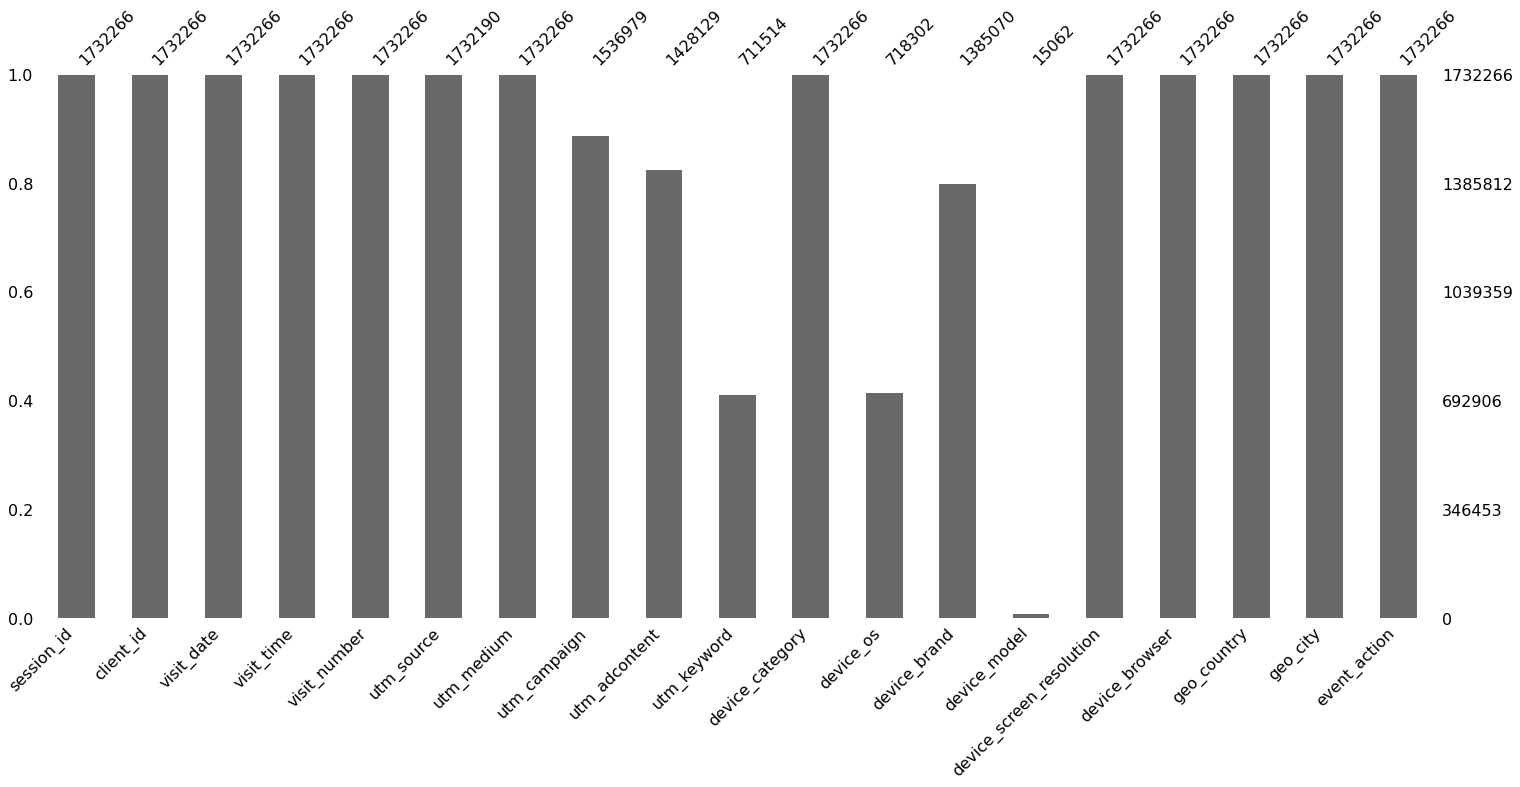

In [36]:
msno.bar(df)

In [37]:
df.device_model.value_counts()

AuMdmADEIoPXiWpTsBEj    9018
tWBQlsvNfHxRUjaPAfhd     596
cwMJxNXiWUgMUxGiCTPs     586
pTgAEPipQxDXCjPrJbHo     430
FJApgTrMAGHoxCxQVKws     347
                        ... 
VDidzTqFGxuqiRQJGrwB       1
hOhIHYHnDhUlkzDoZJdA       1
zcovoWIWBZLooJXEJyTD       1
aWSBcBZlKorTFjJGlWKG       1
qmRODeCJLlmkmwxNYXvp       1
Name: device_model, Length: 104, dtype: int64

In [38]:
df_new = df.drop(columns=['device_model', 'device_screen_resolution'])

In [44]:
stats4 = df.groupby(['geo_country'], as_index=False)[['client_id']].count()
stats4 = stats4.rename(columns={'client_id': 'count_clients'}).sort_values(by='count_clients', ascending=False)
stats4.head()

,geo_country,count_clients
117,Russia,1682423
148,Ukraine,8455
151,United States,8141
16,Belarus,3432
71,Kazakhstan,2109


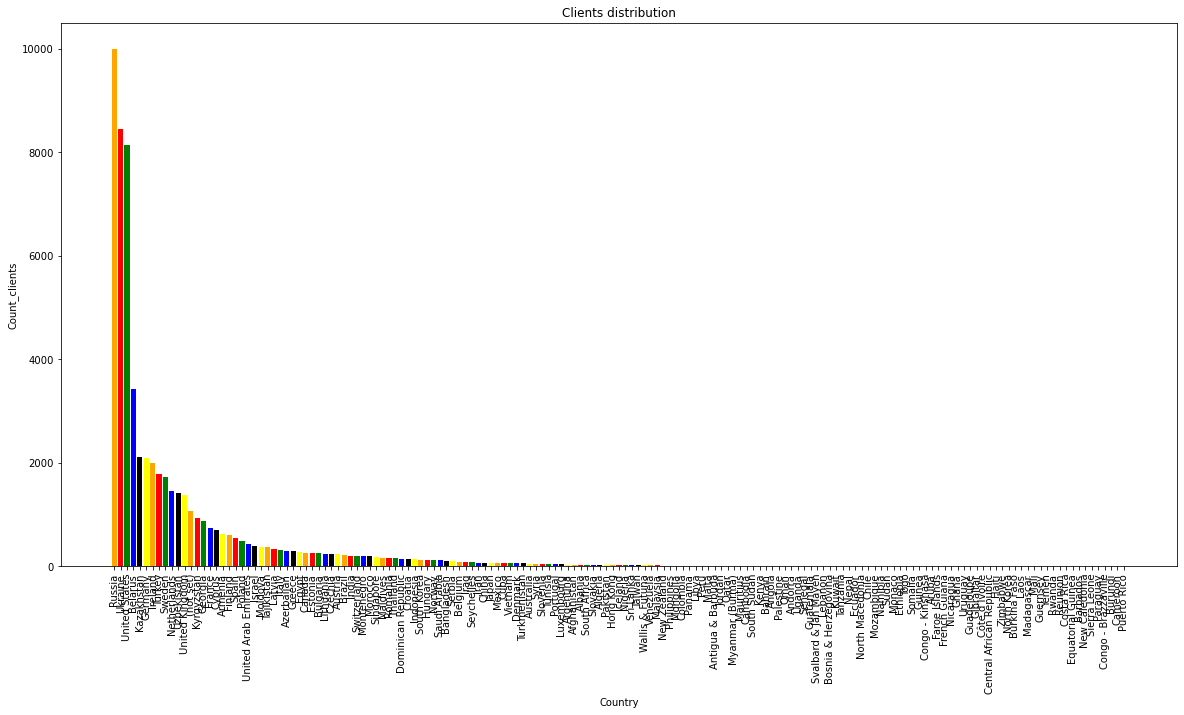

In [50]:
plt.figure(figsize=(20, 10))
plt.bar(stats4['geo_country'], stats4['count_clients'], color=['orange', 'red', 'green', 'blue', 'black', 'yellow'])
plt.xlabel('Country')
plt.xticks(stats4['geo_country'], rotation=90)
plt.ylabel('Count_clients')
plt.title('Clients distribution');

In [51]:
stats4[stats4.count_clients > 1000]

,geo_country,count_clients
117,Russia,10000
148,Ukraine,8455
151,United States,8141
16,Belarus,3432
71,Kazakhstan,2109
50,Germany,2085
66,Ireland,1989
145,Turkey,1787
136,Sweden,1731
97,Netherlands,1451


In [52]:
# Let's limit the value to allow analysis via visualization
stats4.count_clients[117] = 10000

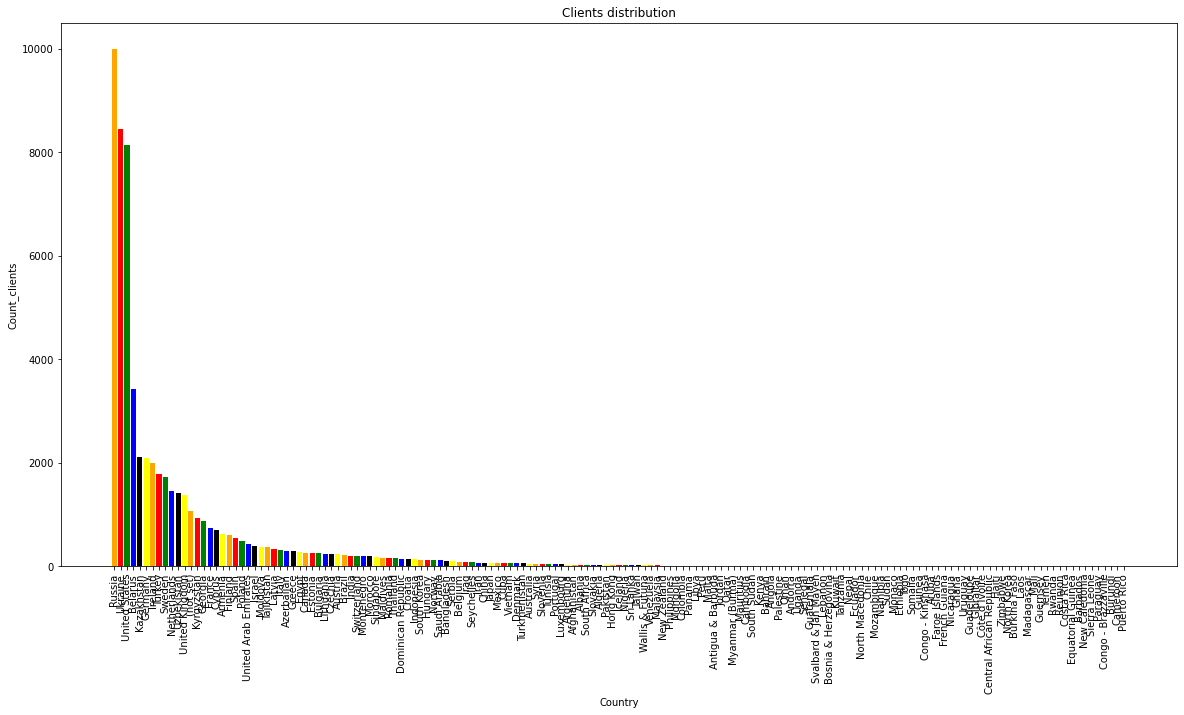

In [53]:
plt.figure(figsize=(20, 10))
plt.bar(stats4['geo_country'], stats4['count_clients'], color=['orange', 'red', 'green', 'blue', 'black', 'yellow'])
plt.xlabel('Country')
plt.xticks(stats4['geo_country'], rotation=90)
plt.ylabel('Count_clients')
plt.title('Clients distribution');

**Based on the “Clients distribution” histogram, it can be seen that the leading majority of clients are from Russia, and in addition, Ukraine and the United States stand out from the rest in terms of the number of clients, occupying 2nd and 3rd place, respectively.**

In [54]:
df_new.visit_date

0          2021-11-24
1          2021-11-14
2          2021-12-28
3          2021-05-29
4          2021-05-29
              ...    
1732261    2021-12-22
1732262    2021-05-26
1732263    2021-11-15
1732264    2021-11-29
1732265    2021-12-31
Name: visit_date, Length: 1732266, dtype: object

In [55]:
df_new['visit_date_new'] = pd.to_datetime(df_new.visit_date)

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732266 entries, 0 to 1732265
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   client_id        object        
 2   visit_date       object        
 3   visit_time       object        
 4   visit_number     int64         
 5   utm_source       object        
 6   utm_medium       object        
 7   utm_campaign     object        
 8   utm_adcontent    object        
 9   utm_keyword      object        
 10  device_category  object        
 11  device_os        object        
 12  device_brand     object        
 13  device_browser   object        
 14  geo_country      object        
 15  geo_city         object        
 16  event_action     int64         
 17  visit_date_new   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(15)
memory usage: 251.1+ MB


In [57]:
stats5 = df_new.groupby(['visit_date_new'], as_index=False)[['client_id']].count()
stats5 = stats5.rename(columns={'client_id': 'count_client'})
stats5

,visit_date_new,count_client
0,2021-05-19,703
1,2021-05-21,826
2,2021-05-22,761
3,2021-05-23,1109
4,2021-05-24,39230
...,...,...
221,2021-12-27,11156
222,2021-12-28,11773
223,2021-12-29,12356
224,2021-12-30,12298


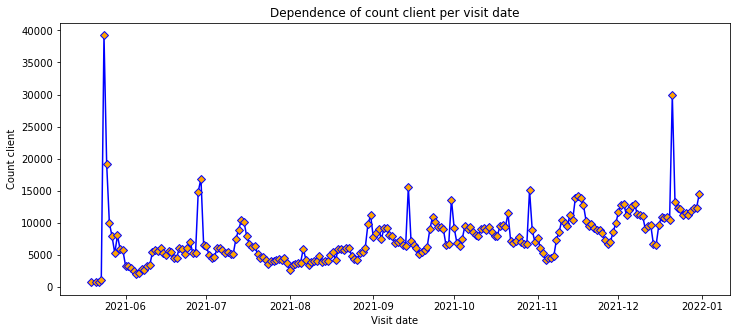

In [58]:
plt.figure(figsize=(12, 5))
plt.plot(stats5.visit_date_new, stats5.count_client, color='blue', marker='D', markerfacecolor='orange')
plt.xlabel('Visit date')
plt.ylabel('Count client')
plt.title('Dependence of count client per visit date')
plt.show();

In [59]:
stats6 = df_new.groupby(['visit_date_new'], as_index=False)[['event_action']].count()
stats6 = stats6.rename(columns={'event_action': 'count_action'})
stats6

,visit_date_new,count_action
0,2021-05-19,703
1,2021-05-21,826
2,2021-05-22,761
3,2021-05-23,1109
4,2021-05-24,39230
...,...,...
221,2021-12-27,11156
222,2021-12-28,11773
223,2021-12-29,12356
224,2021-12-30,12298


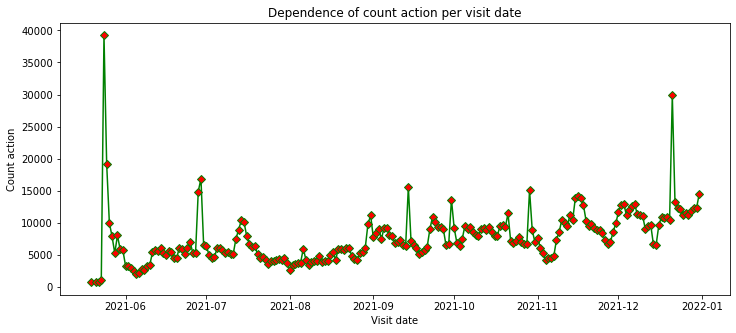

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(stats6.visit_date_new, stats6.count_action, color='green', marker='D', markerfacecolor='red')
plt.xlabel('Visit date')
plt.ylabel('Count action')
plt.title('Dependence of count action per visit date')
plt.show();

In [61]:
stats7 = df_new.groupby(['visit_date_new'], as_index=False)[['event_action']].sum()
stats7 = stats7.rename(columns={'event_action': 'count_action_positive'})
stats7

,visit_date_new,count_action_positive
0,2021-05-19,50
1,2021-05-21,0
2,2021-05-22,11
3,2021-05-23,46
4,2021-05-24,2536
...,...,...
221,2021-12-27,233
222,2021-12-28,239
223,2021-12-29,219
224,2021-12-30,170


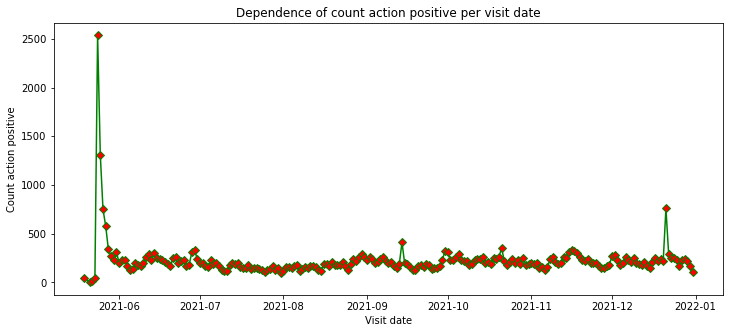

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(stats7.visit_date_new, stats7.count_action_positive, color='green', marker='D', markerfacecolor='red')
plt.xlabel('Visit date')
plt.ylabel('Count action positive')
plt.title('Dependence of count action positive per visit date')
plt.show();

In [63]:
stats8 = stats7
stats8['count_action'] = stats6['count_action']
stats8['action_positive/action'] = stats8.apply(lambda x: ((x['count_action_positive'] / x['count_action']) * 100), axis=1)
stats8

,visit_date_new,count_action_positive,count_action,action_positive/action
0,2021-05-19,50,703,7.112376
1,2021-05-21,0,826,0.000000
2,2021-05-22,11,761,1.445466
3,2021-05-23,46,1109,4.147881
4,2021-05-24,2536,39230,6.464440
...,...,...,...,...
221,2021-12-27,233,11156,2.088562
222,2021-12-28,239,11773,2.030069
223,2021-12-29,219,12356,1.772418
224,2021-12-30,170,12298,1.382339


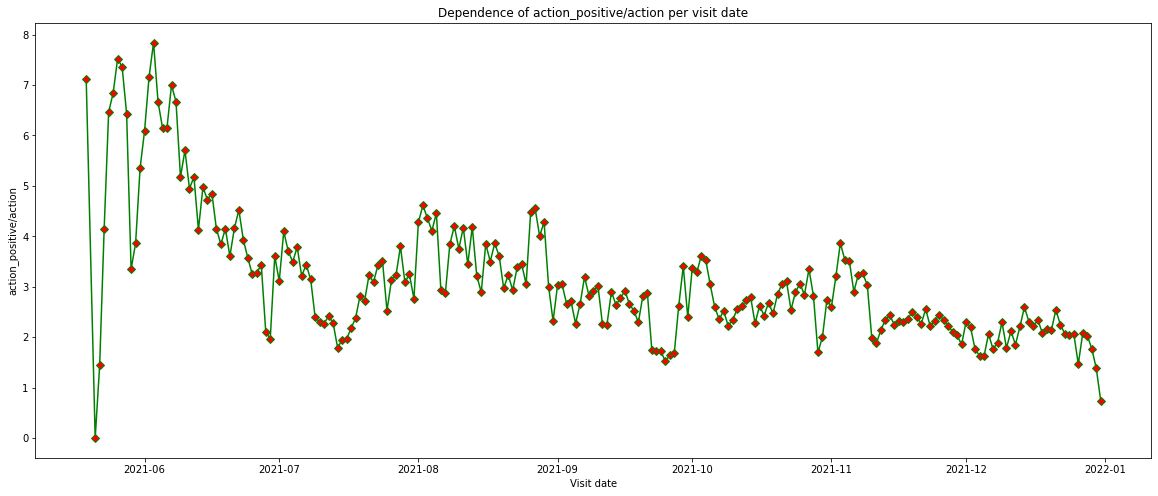

In [64]:
plt.figure(figsize=(20, 8))
plt.plot(stats8['visit_date_new'], stats8['action_positive/action'], color='green', marker='D', markerfacecolor='red')
plt.xlabel('Visit date')
plt.ylabel('action_positive/action')
plt.title('Dependence of action_positive/action per visit date')
plt.show();

**Based on the graphs "Dependence of count client per visit date", "Dependence of count action per visit date", "Dependence of count action positive per visit date", "Dependence of action_positive/action per visit date" the following conclusions can be made:**\
\
**1) The number of clients and the actions they perform increases over time, in addition, they correlate with each other.**\
**2) The number of target actions performed by clients remains approximately at the same level over time, while, given the increase in the number of clients, the share of target actions of clients in relation to the total number of events decreases over time.**


In [65]:
# Сorrelations
df_new.corr()

,visit_number,event_action
visit_number,1.000000,0.027947
event_action,0.027947,1.000000


**There is no correlation between the customer's visit number and the action they took**